In [2]:
%matplotlib inline

#DataFrame modules
import pandas as pd

#folium map visualizer
import folium

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#Cluster Kmeans
from sklearn.cluster import KMeans

#for making http request to foursquare APIs
import requests, json

#plot the data on scatter plot
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

In [3]:
df = pd.read_csv('prop_data_clean_filterd_data_set_removed_missing_values_1000.csv')

#there is total 34349 in rent house data,
#i have already droped un-relevant columns and data set of 1000 record
#out of this 1000 data we will process 150 data from prop_data_clean_filterd_data_set_removed_missing_values_1000.csv

#NOTE : YOU CAN CHANGE DATA USEAGE SIZE BY MODIFYING BELOW LINE
df = df[0:150]
df = df.sort_values(by='area',ascending=True)
df.head()

,area,desc,latitude,locality,longitude,price,title
101,225,"1 Bath,Unfurnished,1 floor,South facing Single...",19.233532,Borivali West,72.839195,11500,1 BHK Apartment for Rent in Borivali West
53,225,"1 Bath,Unfurnished,Upper Basement floor 1 BHK,...",19.009829,Antop Hill,72.825241,16000,1 BHK Apartment for Rent in Antop Hill
62,225,"1 Bath,Unfurnished,1 floor,West facing hi i ha...",72.874649,Azad Nagar,19.174179,18000,1 BHK Apartment for Rent in Azad Nagar
15,225,"1 Bath,Semi-Furnished,4 floor,North - East fac...",19.134399,Andheri East,72.868393,10000,1 BHK Apartment for Rent in Andheri East
14,225,"1 Bath,Semi-Furnished,1 floor One Room Kitchen...",19.115490,Andheri East,72.872696,15000,1 BHK Apartment for Rent in Andheri East


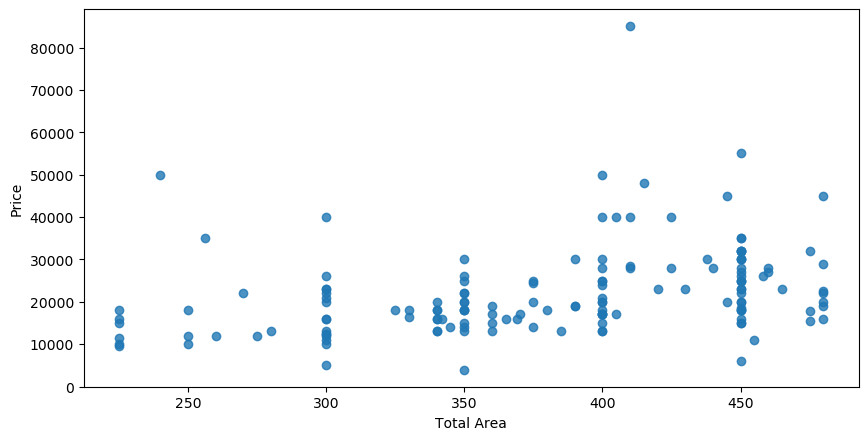

In [4]:
#lets plot the scatter plot to see the relation between Total area of house and price of house

figure(num=None, figsize=(10,5),dpi=100)

x = df.area
y = df.price


plt.scatter(x, y, alpha=0.8,cmap='viridis')
plt.xlabel('Total Area')
plt.ylabel('Price')
plt.show()
#dark green #097502
#light green #5CDD53
#light red #097502
#Dark light Red  #C08D8D
#Dark Red #C05252

### Above scatter plot show the that as the total house area increase the prices also increased

## Rent house price range distribution
### Markers are classified based on following criteria

<div class="alert alert-block" style="background-color:darkgreen">
<b>Price range from ₹5000 to ₹10000</b>
</div>

<div class="alert alert-block" style="background-color:green">
<b>Price range from ₹10000 to ₹20000</b>
</div>

<div class="alert alert-block" style="background-color:lightgreen">
<b>Price range from ₹20000 to ₹30000</b>
</div>

<div class="alert alert-block" style="background-color:#FF8D7E">
<b>Price range from ₹30000 to ₹40000</b>
</div>

<div class="alert alert-block" style="background-color:red">
<b>Price range from ₹40000 to ₹50000</b>
</div>

In [6]:
m = folium.Map(location=[19.136816,72.854794], zoom_start=13,width=1000,height=500)

for i in range(0,len(df.latitude)):
    #titleWithPrice = "<b>Area Name</b> : " + df.iloc[i]['locality']+", "  + "</br><b>House description</b> : "+df.iloc[i]['title']+", " +"</br> <b>Rent</b> : "+str(df.iloc[i]['price'])+"/- month"
    
    titleWithPrice = "<b>Area Name</b> : " + df.iloc[i]['locality']+", "  + "</br><b>House description</b> : "+df.iloc[i]['title']+", " +"</br> <b>Rent</b> : "+str(df.iloc[i]['price'])+"/- month"
    #+"</br>"+str(df.iloc[i]['latitude'])+" "+str(df.iloc[i]['longitude'])
    
    colorCodeMarker = "blue"
    if(df.iloc[i]['price'] in range(5000,10000)):
        colorCodeMarker = 'darkgreen'
    elif(df.iloc[i]['price'] in range(10000,20000)):
        colorCodeMarker = 'green'
    elif(df.iloc[i]['price'] in range(20000,30000)):
        colorCodeMarker = 'lightgreen'
    elif(df.iloc[i]['price'] in range(30000,40000)):
        colorCodeMarker = 'lightred'
    elif(df.iloc[i]['price'] in range(40000,50000)):
        colorCodeMarker = 'red'
            
    folium.Marker([df.iloc[i]['latitude'], df.iloc[i]['longitude']], popup=titleWithPrice, icon=folium.Icon(color=colorCodeMarker,icon_color='white')).add_to(m)
m

### In order to save above clustered map to .html file you can execute below line

In [130]:
m.save('312_markers_on_folium_map1.html')

In [194]:
#now lets explore the Restaurant venue using foursquare API

url = "https://api.foursquare.com/v2/venues/explore"

params = dict(
    client_id='',# Place your client_id of foursquare API
    client_secret='',# Place your client_secret of foursquare API
    v='20180323',
    ll='19.14780617, 72.84235382',
    query='Restaurant',
    limit=1,
    radius=1000,
)

res = requests.get(url=url,params=params)

res.text

'{"meta":{"code":429,"errorType":"quota_exceeded","errorDetail":"Quota exceeded","requestId":"5f0ad80728796f3c9c32c3c4"},"response":{}}'

In [186]:
def getNearVenus(names, latitudes, longitudes, radius=1000):
    
    lists_of_data=[]
    for name,lat,lng in zip(names, latitudes, longitudes):
        print(name)
        
        url = "https://api.foursquare.com/v2/venues/explore"

        params = dict(
            client_id='',# Place your client_id of foursquare API
            client_secret='',# Place your client_secret of foursquare API
            v='20180323',
            ll='{},{}'.format(lat, lng),
            query='Restaurant',
            limit=1,
            radius=radius,
        )
            
        results = requests.get(url=url,params=params).json()["response"]['groups'][0]['items']
        
        lists_of_data.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in lists_of_data for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
ndf = getNearVenus(names=df.locality,
                   latitudes=df['latitude'],
                   longitudes=df['longitude']
                  )

In [143]:
ndf.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Borivali West,19.233532,72.839195,Dakshin,19.229800,72.842783,Restaurant
1,Antop Hill,19.009829,72.825241,"And Chillies, Pan Asian Cuisine",19.006001,72.824465,Thai Restaurant
2,Andheri East,19.134399,72.868393,Chilly & Onion restaurant,19.131110,72.869123,Asian Restaurant
3,Andheri East,19.115490,72.872696,Spirit Kitchen and Bar,19.111258,72.869820,Indian Restaurant
4,Borivali West,19.233532,72.839195,Dakshin,19.229800,72.842783,Restaurant


In [144]:
ndf.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
4 Bunglows,1,1,1,1,1,1
Aarey Milk Colony,12,12,12,12,12,12
Akurli Nagar,1,1,1,1,1,1
Andheri East,22,22,22,22,22,22
Andheri West,16,16,16,16,16,16
Antop Hill,1,1,1,1,1,1
Asalfa Village JJC,1,1,1,1,1,1
Asha Nagar,5,5,5,5,5,5
Ashok Nagar Western Mumbai,2,2,2,2,2,2


In [145]:
#lets abalyze the data 
noht = pd.get_dummies(ndf[['Venue Category']],prefix="",prefix_sep="")

noht['Neighborhood'] = ndf['Neighborhood']

fixCoulnms = [noht.columns[-1]] + list(noht.columns[0:-1])

noht = noht[fixCoulnms]

noht.head()

,Neighborhood,Asian Restaurant,Bakery,Brazilian Restaurant,Café,Chinese Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,...,Fast Food Restaurant,Food Truck,German Restaurant,Indian Restaurant,Pizza Place,Punjabi Restaurant,Restaurant,Seafood Restaurant,Snack Place,Thai Restaurant
0,Borivali West,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Antop Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Andheri East,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Andheri East,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Borivali West,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [146]:
venue_grouped = noht.groupby('Neighborhood').mean().reset_index()
venue_grouped.shape
venue_grouped

,Neighborhood,Asian Restaurant,Bakery,Brazilian Restaurant,Café,Chinese Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,...,Fast Food Restaurant,Food Truck,German Restaurant,Indian Restaurant,Pizza Place,Punjabi Restaurant,Restaurant,Seafood Restaurant,Snack Place,Thai Restaurant
0,4 Bunglows,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,...,0.000000,0.000000,0.000000,1.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0
1,Aarey Milk Colony,0.000000,0.000000,0.0,0.916667,0.000000,0.000000,0.000000,0.0000,0.0,...,0.000000,0.000000,0.000000,0.083333,0.0000,0.000000,0.000000,0.000000,0.000000,0.0
2,Akurli Nagar,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0
3,Andheri East,0.045455,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,...,0.000000,0.000000,0.000000,0.909091,0.0000,0.000000,0.045455,0.000000,0.000000,0.0
4,Andheri West,0.000000,0.062500,0.0,0.000000,0.000000,0.000000,0.000000,0.0625,0.0,...,0.000000,0.000000,0.000000,0.375000,0.4375,0.000000,0.000000,0.000000,0.000000,0.0
5,Antop Hill,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,1.0
6,Asalfa Village JJC,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,...,0.000000,0.000000,0.000000,1.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0
7,Asha Nagar,0.000000,0.000000,0.0,0.000000,0.200000,0.000000,0.000000,0.0000,0.0,...,0.000000,0.000000,0.000000,0.400000,0.4000,0.000000,0.000000,0.000000,0.000000,0.0
8,Ashok Nagar Western Mumbai,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,...,0.000000,0.000000,0.000000,0.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.0
9,Azad Nagar,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0


In [160]:
#get top 5 venues near Neighborhood and find the frequency

nOfVenue = 5

for item in venue_grouped['Neighborhood']:
    print("-------"+item)
    t = venue_grouped[venue_grouped['Neighborhood']==item].T.reset_index()
    t.columns = ['venue','freq']
    t = t.iloc[1:]
    t['freq'] = t['freq'].astype(float)
    t = t.round({'freq':2})
    print(t.sort_values('freq',ascending=False).reset_index(drop=True).head(nOfVenue))

-------4 Bunglows
               venue  freq
0  Indian Restaurant   1.0
1   Asian Restaurant   0.0
2             Bakery   0.0
-------Aarey Milk Colony
               venue  freq
0               Café  0.92
1  Indian Restaurant  0.08
2   Asian Restaurant  0.00
-------Akurli Nagar
                venue  freq
0  Chinese Restaurant   1.0
1    Asian Restaurant   0.0
2          Food Truck   0.0
-------Andheri East
               venue  freq
0  Indian Restaurant  0.91
1   Asian Restaurant  0.05
2         Restaurant  0.05
-------Andheri West
               venue  freq
0        Pizza Place  0.44
1  Indian Restaurant  0.38
2              Diner  0.06
-------Antop Hill
             venue  freq
0  Thai Restaurant   1.0
1           Bakery   0.0
2      Snack Place   0.0
-------Asalfa Village JJC
               venue  freq
0  Indian Restaurant   1.0
1   Asian Restaurant   0.0
2             Bakery   0.0
-------Asha Nagar
                venue  freq
0         Pizza Place   0.4
1   Indian Restaurant   0.4

In [148]:
def getCommonVenues(row,no_of_top_venue):
    row_c = row.iloc[1:]
    row_c_sorted = row_c.sort_values(ascending=False)
    return row_c_sorted.index.values[0:no_of_top_venue]

In [149]:
#find top 5 venues for each house Neighborhood
no_of_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(no_of_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Neighborhood'] = venue_grouped['Neighborhood']

for ind in np.arange(venue_grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = getCommonVenues(venue_grouped.iloc[ind, :], no_of_venues)

venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,4 Bunglows,Indian Restaurant,Thai Restaurant,Donut Shop,Bakery,Brazilian Restaurant
1,Aarey Milk Colony,Café,Indian Restaurant,Thai Restaurant,Donut Shop,Bakery
2,Akurli Nagar,Chinese Restaurant,Thai Restaurant,Snack Place,Bakery,Brazilian Restaurant
3,Andheri East,Indian Restaurant,Asian Restaurant,Restaurant,Donut Shop,Bakery
4,Andheri West,Pizza Place,Indian Restaurant,Falafel Restaurant,Bakery,Diner


In [150]:
# create K-cluester of house Neighborhood venues

kCluster = 5
venue_groued_cluster = venue_grouped.drop('Neighborhood',1)

kmenas = KMeans(n_clusters=kCluster,random_state=0).fit(venue_groued_cluster)
kmenas.labels_[0:10]

array([0, 1, 4, 0, 4, 4, 0, 4, 4, 1], dtype=int32)

In [151]:
venues_sorted.insert(0,'Cluster',kmenas.labels_)
venue_margred = df
venue_margred = venue_margred.join(venues_sorted.set_index('Neighborhood'),on='locality')

In [152]:
venue_margred.head()

,area,desc,latitude,locality,longitude,price,title,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
101,225,"1 Bath,Unfurnished,1 floor,South facing Single...",19.233532,Borivali West,72.839195,11500,1 BHK Apartment for Rent in Borivali West,4,Restaurant,Seafood Restaurant,Thai Restaurant,Donut Shop,Bakery
53,225,"1 Bath,Unfurnished,Upper Basement floor 1 BHK,...",19.009829,Antop Hill,72.825241,16000,1 BHK Apartment for Rent in Antop Hill,4,Thai Restaurant,Snack Place,Bakery,Brazilian Restaurant,Café
62,225,"1 Bath,Unfurnished,1 floor,West facing hi i ha...",72.874649,Azad Nagar,19.174179,18000,1 BHK Apartment for Rent in Azad Nagar,1,Café,Thai Restaurant,Snack Place,Bakery,Brazilian Restaurant
15,225,"1 Bath,Semi-Furnished,4 floor,North - East fac...",19.134399,Andheri East,72.868393,10000,1 BHK Apartment for Rent in Andheri East,0,Indian Restaurant,Asian Restaurant,Restaurant,Donut Shop,Bakery
14,225,"1 Bath,Semi-Furnished,1 floor One Room Kitchen...",19.115490,Andheri East,72.872696,15000,1 BHK Apartment for Rent in Andheri East,0,Indian Restaurant,Asian Restaurant,Restaurant,Donut Shop,Bakery


### Now lets visualize final clusted the result on map

In [ ]:
# create map
mapClusters = folium.Map(location=[19.136816,72.854794], zoom_start=11,width=1000,height=500)

# set color scheme for the clusters
x = np.arange(kCluster)
ys = [i + x + (i*x)**2 for i in range(kCluster)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(venue_margred['latitude'], venue_margred['longitude'], venue_margred['locality'], venue_margred['Cluster']):
    label = folium.Popup("Area Name : "+str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(mapClusters)
       
mapClusters